In [19]:
from datasets import ConvexBananaDataset
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="convex_banana",
    dataset_number_of_points=100000,
    dataloader_parameters=dict(batch_size=512, shuffle=True),
    pushforward_operator_name="unconstrained_amortized_optimal_transport_quantile_regression",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=17,
        number_of_hidden_layers=8,
        activation_function_name="Softplus",
        network_type="PISCNN",
        potential_to_estimate_with_neural_network="u"
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=0,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)
dataset = ConvexBananaDataset(**experiment.dataset_parameters, tensor_parameters=experiment.tensor_parameters)


model = train(experiment)
_ = model.load("../experiments_22_08_2025/convex_banana_large_scale/unconstrained_amortized_optimal_transport_quantile_regression/u/PISCNN/weights.pth")
_ = model.eval()

Training: 0it [00:00, ?it/s]


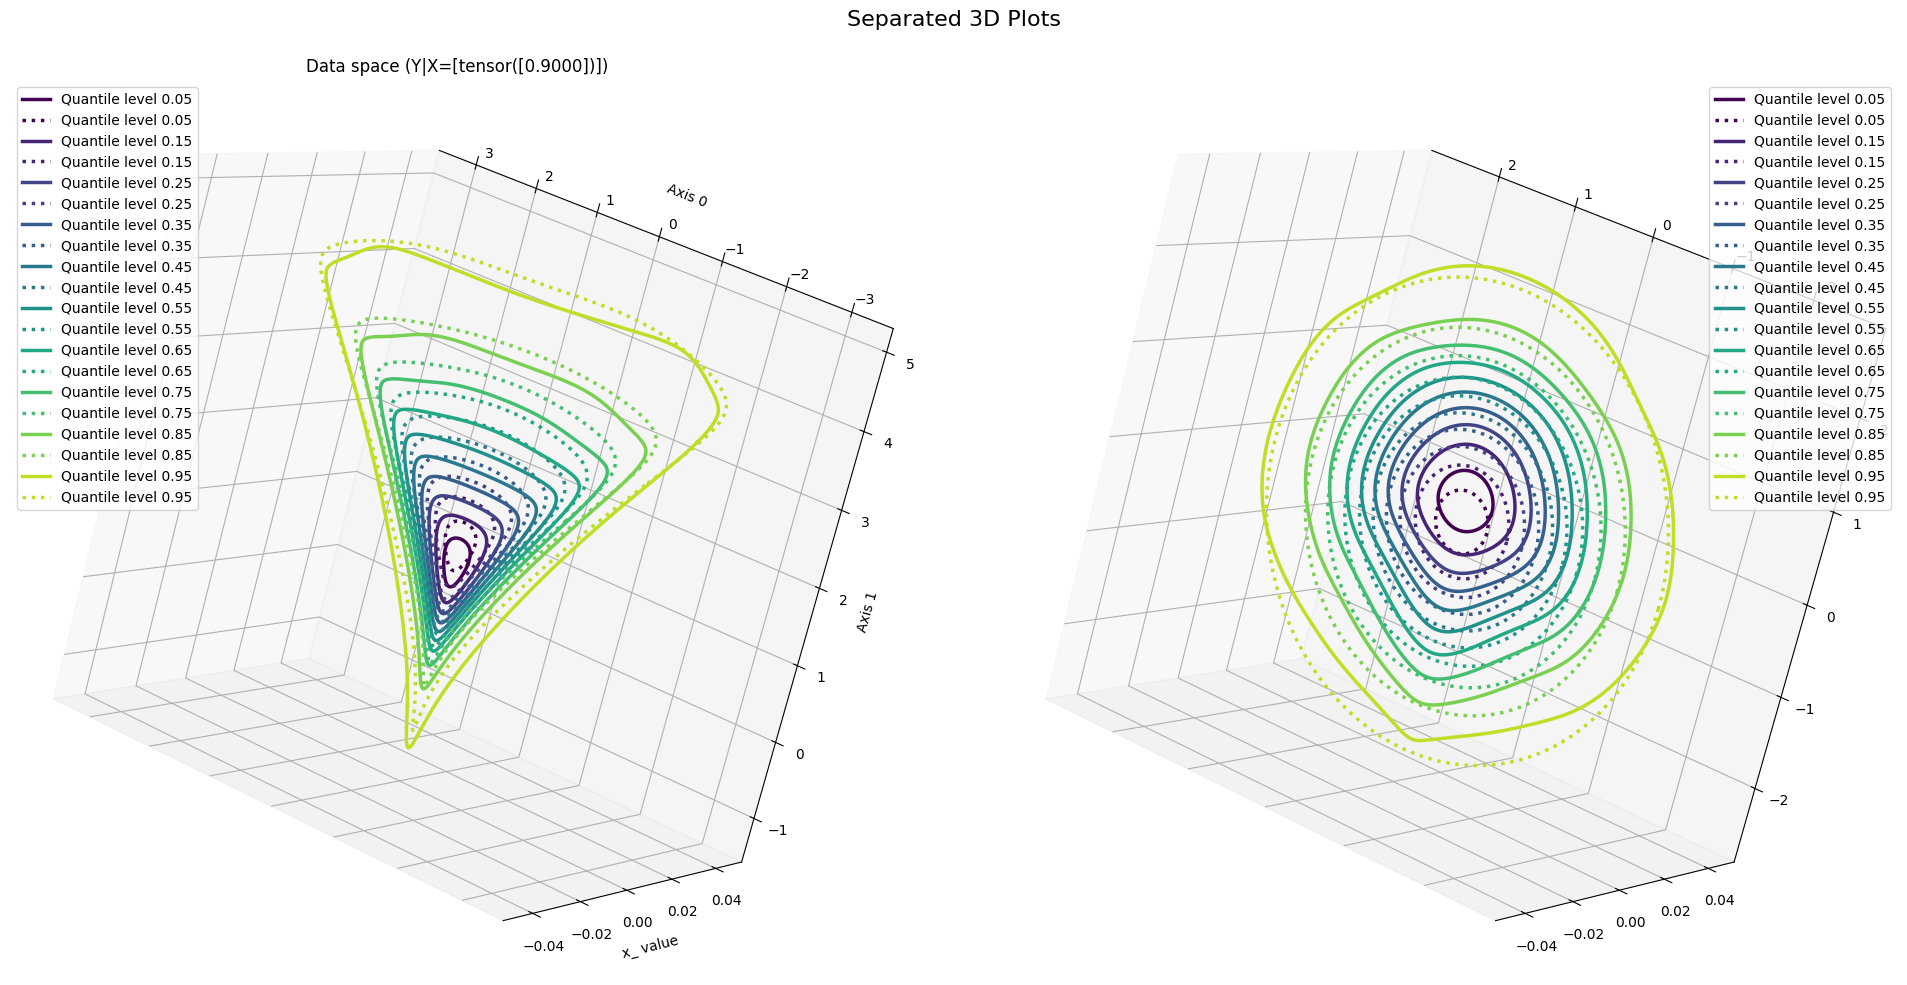

In [20]:
%matplotlib inline
from utils.plot import plot_quantile_levels_from_dataset
dataset = ConvexBananaDataset(**experiment.dataset_parameters, tensor_parameters=experiment.tensor_parameters)

plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=torch.Tensor([[.9]]),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)

In [ ]:
from datasets import ConvexBananaDataset
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="convex_banana",
    dataset_number_of_points=100000,
    dataloader_parameters=dict(batch_size=512, shuffle=True),
    pushforward_operator_name="unconstrained_amortized_optimal_transport_quantile_regression",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=35,
        number_of_hidden_layers=8,
        activation_function_name="Softplus",
        network_type="SCFFNN",
        potential_to_estimate_with_neural_network="u"
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=0,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)
dataset = ConvexBananaDataset(**experiment.dataset_parameters, tensor_parameters=experiment.tensor_parameters)


model = train(experiment)
_ = model.load("../experiments_22_08_2025/convex_banana_large_scale/unconstrained_amortized_optimal_transport_quantile_regression/u/SCFFNN/weights.pth")
_ = model.eval()

Training: 0it [00:00, ?it/s]


RuntimeError: Error(s) in loading state_dict for UnconstrainedAmortizedOTQuantileRegression:
	size mismatch for potential_network.first_linear_layer_tilde.weight: copying a param with shape torch.Size([17, 1]) from checkpoint, the shape in current model is torch.Size([35, 1]).
	size mismatch for potential_network.first_linear_layer_tilde.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.first_linear_layer_y.weight: copying a param with shape torch.Size([17, 2]) from checkpoint, the shape in current model is torch.Size([35, 2]).
	size mismatch for potential_network.first_linear_layer_u.weight: copying a param with shape torch.Size([17, 1]) from checkpoint, the shape in current model is torch.Size([35, 1]).
	size mismatch for potential_network.linear_layer_tilde.0.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_tilde.0.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_tilde.1.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_tilde.1.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_tilde.2.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_tilde.2.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_tilde.3.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_tilde.3.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_tilde.4.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_tilde.4.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_tilde.5.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_tilde.5.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_tilde.6.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_tilde.6.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_tilde.7.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_tilde.7.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_uz.0.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_uz.0.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_uz.1.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_uz.1.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_uz.2.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_uz.2.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_uz.3.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_uz.3.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_uz.4.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_uz.4.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_uz.5.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_uz.5.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_uz.6.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_uz.6.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_uz.7.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_uz.7.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_z.0.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_z.0.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_z.1.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_z.1.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_z.2.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_z.2.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_z.3.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_z.3.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_z.4.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_z.4.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_z.5.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_z.5.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_z.6.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_z.6.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_z.7.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_z.7.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.linear_layer_uy.0.weight: copying a param with shape torch.Size([2, 17]) from checkpoint, the shape in current model is torch.Size([2, 35]).
	size mismatch for potential_network.linear_layer_uy.1.weight: copying a param with shape torch.Size([2, 17]) from checkpoint, the shape in current model is torch.Size([2, 35]).
	size mismatch for potential_network.linear_layer_uy.2.weight: copying a param with shape torch.Size([2, 17]) from checkpoint, the shape in current model is torch.Size([2, 35]).
	size mismatch for potential_network.linear_layer_uy.3.weight: copying a param with shape torch.Size([2, 17]) from checkpoint, the shape in current model is torch.Size([2, 35]).
	size mismatch for potential_network.linear_layer_uy.4.weight: copying a param with shape torch.Size([2, 17]) from checkpoint, the shape in current model is torch.Size([2, 35]).
	size mismatch for potential_network.linear_layer_uy.5.weight: copying a param with shape torch.Size([2, 17]) from checkpoint, the shape in current model is torch.Size([2, 35]).
	size mismatch for potential_network.linear_layer_uy.6.weight: copying a param with shape torch.Size([2, 17]) from checkpoint, the shape in current model is torch.Size([2, 35]).
	size mismatch for potential_network.linear_layer_uy.7.weight: copying a param with shape torch.Size([2, 17]) from checkpoint, the shape in current model is torch.Size([2, 35]).
	size mismatch for potential_network.linear_layer_y.0.weight: copying a param with shape torch.Size([17, 2]) from checkpoint, the shape in current model is torch.Size([35, 2]).
	size mismatch for potential_network.linear_layer_y.1.weight: copying a param with shape torch.Size([17, 2]) from checkpoint, the shape in current model is torch.Size([35, 2]).
	size mismatch for potential_network.linear_layer_y.2.weight: copying a param with shape torch.Size([17, 2]) from checkpoint, the shape in current model is torch.Size([35, 2]).
	size mismatch for potential_network.linear_layer_y.3.weight: copying a param with shape torch.Size([17, 2]) from checkpoint, the shape in current model is torch.Size([35, 2]).
	size mismatch for potential_network.linear_layer_y.4.weight: copying a param with shape torch.Size([17, 2]) from checkpoint, the shape in current model is torch.Size([35, 2]).
	size mismatch for potential_network.linear_layer_y.5.weight: copying a param with shape torch.Size([17, 2]) from checkpoint, the shape in current model is torch.Size([35, 2]).
	size mismatch for potential_network.linear_layer_y.6.weight: copying a param with shape torch.Size([17, 2]) from checkpoint, the shape in current model is torch.Size([35, 2]).
	size mismatch for potential_network.linear_layer_y.7.weight: copying a param with shape torch.Size([17, 2]) from checkpoint, the shape in current model is torch.Size([35, 2]).
	size mismatch for potential_network.linear_layer_u.0.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_u.1.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_u.2.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_u.3.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_u.4.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_u.5.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_u.6.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.linear_layer_u.7.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.last_linear_layer_uz.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for potential_network.last_linear_layer_uz.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for potential_network.last_linear_layer_z.weight: copying a param with shape torch.Size([1, 17]) from checkpoint, the shape in current model is torch.Size([1, 35]).
	size mismatch for potential_network.last_linear_layer_uy.weight: copying a param with shape torch.Size([2, 17]) from checkpoint, the shape in current model is torch.Size([2, 35]).
	size mismatch for potential_network.last_linear_layer_u.weight: copying a param with shape torch.Size([1, 17]) from checkpoint, the shape in current model is torch.Size([1, 35]).
	size mismatch for amortization_network.amortization_network.0.weight: copying a param with shape torch.Size([17, 6]) from checkpoint, the shape in current model is torch.Size([35, 6]).
	size mismatch for amortization_network.amortization_network.0.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for amortization_network.amortization_network.2.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for amortization_network.amortization_network.2.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for amortization_network.amortization_network.4.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for amortization_network.amortization_network.4.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for amortization_network.amortization_network.6.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for amortization_network.amortization_network.6.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for amortization_network.amortization_network.8.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for amortization_network.amortization_network.8.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for amortization_network.amortization_network.10.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for amortization_network.amortization_network.10.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for amortization_network.amortization_network.12.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for amortization_network.amortization_network.12.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for amortization_network.amortization_network.14.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for amortization_network.amortization_network.14.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for amortization_network.amortization_network.16.weight: copying a param with shape torch.Size([17, 17]) from checkpoint, the shape in current model is torch.Size([35, 35]).
	size mismatch for amortization_network.amortization_network.16.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([35]).
	size mismatch for amortization_network.amortization_network.18.weight: copying a param with shape torch.Size([2, 17]) from checkpoint, the shape in current model is torch.Size([2, 35]).

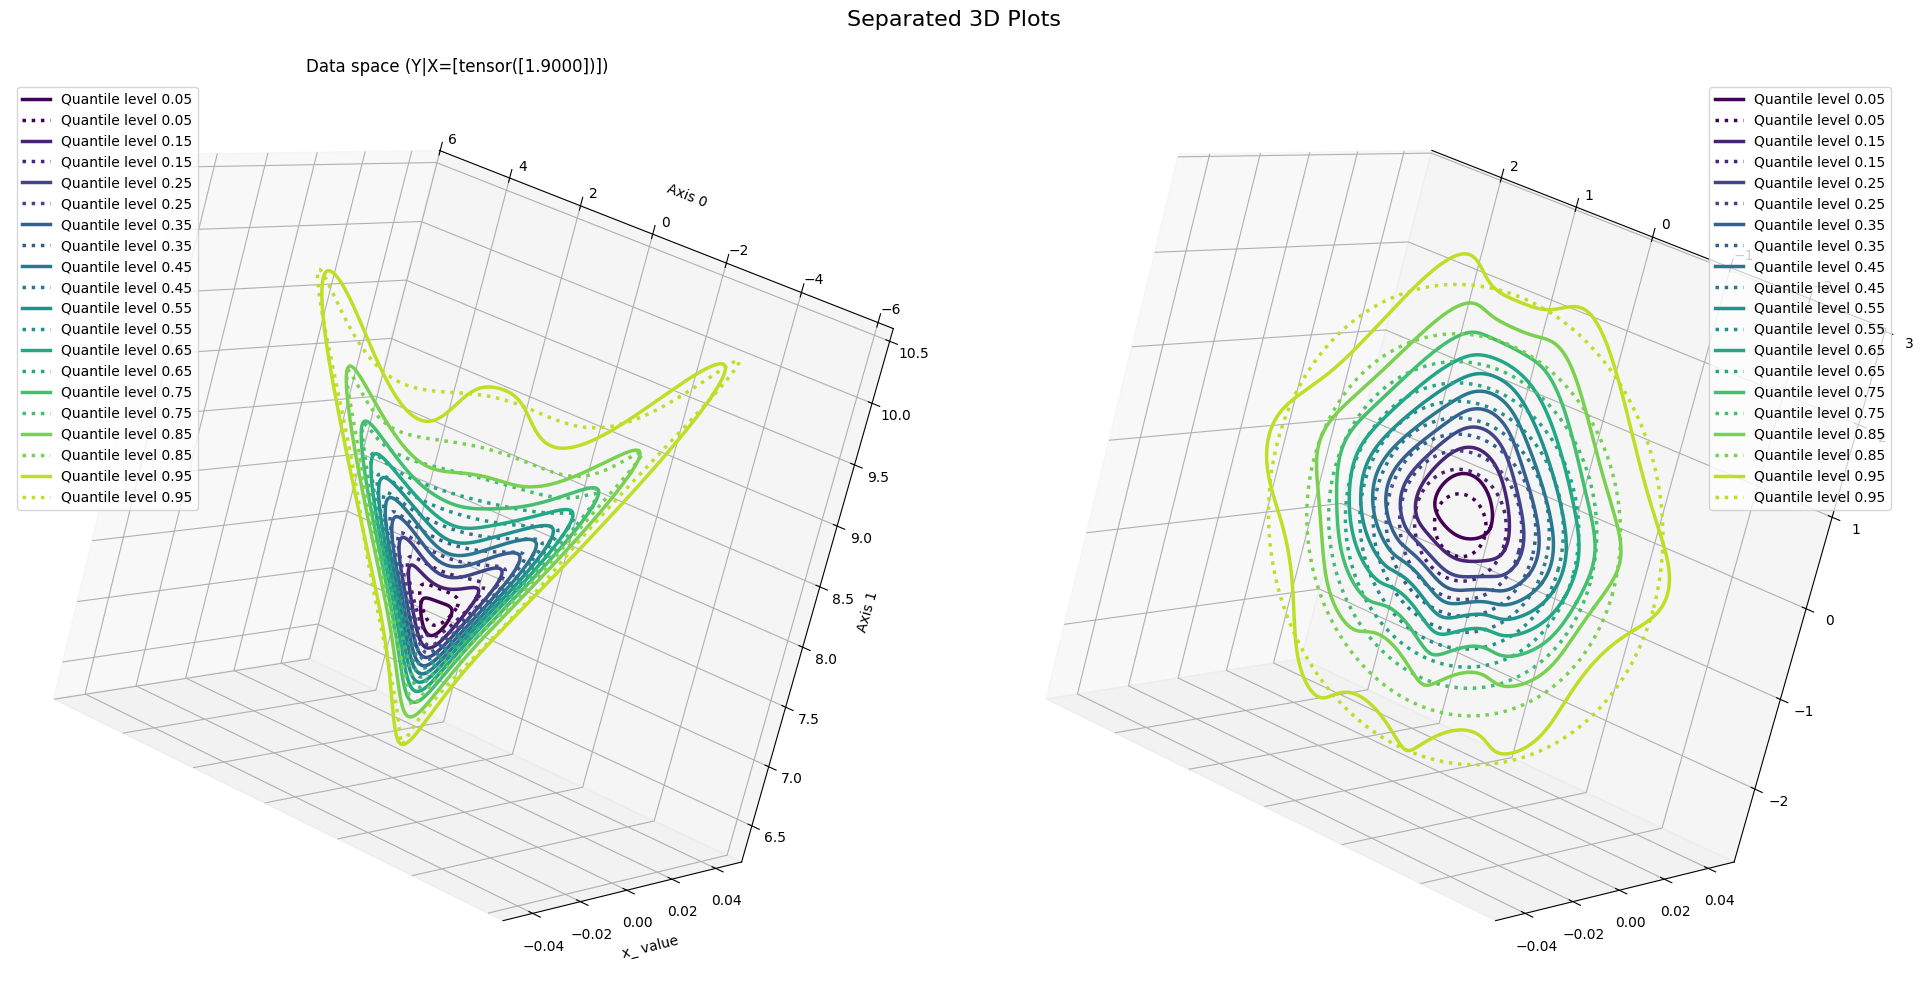

In [ ]:
%matplotlib inline
from utils.plot import plot_quantile_levels_from_dataset
dataset = ConvexBananaDataset(**experiment.dataset_parameters, tensor_parameters=experiment.tensor_parameters)

plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=torch.Tensor([[1.9]]),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)